<a href="https://colab.research.google.com/github/Rafia-Shaikh-eng/Comparative-Analysis-of-Positional-Encoding-Robustness-in-Medical-Retrieval-Agents/blob/main/Comparative_Analysis_of_Positional_Encoding_Robustness_in_Medical_Retrieval_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !pip install -q -U langgraph langchain langchain_community
# !pip install -q -U transformers accelerate bitsandbytes
# !pip install -q -U sentencepiece

#Load the Model (4-bit Quantization)

In [7]:
# import torch
# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
# from langchain_community.llms import HuggingFacePipeline

# # 1. Config for 4-bit quantization (Crucial for Colab)
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_compute_dtype=torch.bfloat16
# )

# # 2. Load Model (Llama-3-8B-Instruct)
# model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit" # Pre-quantized for speed

# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

# # 3. Create LangChain Pipeline
# text_generation_pipeline = pipeline(
#     model=model,
#     tokenizer=tokenizer,
#     task="text-generation",
#     temperature=0.1,
#     do_sample=True,
#     repetition_penalty=1.1,
#     return_full_text=False,
#     max_new_tokens=256,
# )

# llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

# print("✅ Model Loaded Successfully")

#Define the LangGraph Agent

In [8]:
# from typing import TypedDict
# from langgraph.graph import StateGraph, END

# # 1. Define the State
# class AgentState(TypedDict):
#     context: str         # The long medical text
#     question: str        # The question to answer
#     answer: str          # The generated answer

# # 2. Define the Node (The "Brain")
# def medical_reasoning_node(state):
#     # Prompt engineering to force the model to look at the context
#     prompt = f"""
#     <|begin_of_text|><|start_header_id|>system<|end_header_id|>
#     You are an expert Medical AI Assistant. You must answer the question solely based on the Context provided below.
#     If the answer is not in the context, say "I don't know".
#     <|eot_id|><|start_header_id|>user<|end_header_id|>

#     Context:
#     {state['context']}

#     Question:
#     {state['question']}
#     <|eot_id|><|start_header_id|>assistant<|end_header_id|>
#     """

#     # Invoke model
#     response = llm.invoke(prompt)
#     return {"answer": response}

# # 3. Build the Graph
# workflow = StateGraph(AgentState)
# workflow.add_node("doctor_agent", medical_reasoning_node)
# workflow.set_entry_point("doctor_agent")
# workflow.add_edge("doctor_agent", END)

# app = workflow.compile()
# print("✅ Agent Graph Built")

#The Experiment (The "Needle" Injection)

In [9]:
# # 1. The "Needle" (The critical fact)
# needle = " The patient, John Doe, has a severe allergy to peanuts and must not be prescribed Arachis oil. "

# # 2. The "Haystack" (Filler text - simulated medical notes)
# # In a real paper, download a dataset. For this code, we repeat a sentence to fill space.
# filler_text = "The patient reports mild fatigue. Vital signs are stable. No significant family history of cardiac disease. "

# def run_experiment(context_length_tokens, needle_position_percent):
#     # A. Construct the text
#     # Estimate: 1 token ~= 4 chars.
#     target_chars = context_length_tokens * 4

#     # Create haystack
#     haystack = filler_text * (target_chars // len(filler_text))

#     # Insert Needle
#     insert_idx = int(len(haystack) * (needle_position_percent / 100))
#     final_context = haystack[:insert_idx] + needle + haystack[insert_idx:]

#     # B. Run the Agent
#     inputs = {
#         "context": final_context,
#         "question": "Does the patient John Doe have any specific allergies?"
#     }

#     result = app.invoke(inputs)
#     return result["answer"]

# # --- EXECUTE THE TEST ---
# print("Running Experiment...")

# # Test 1: Short Context, Needle at Start
# ans_1 = run_experiment(context_length_tokens=1000, needle_position_percent=0)
# print(f"Test 1 (Short/Start): {ans_1}")

# # Test 2: Long Context, Needle in Middle (This is where PE often fails!)
# ans_2 = run_experiment(context_length_tokens=6000, needle_position_percent=50)
# print(f"Test 2 (Long/Middle): {ans_2}")

# # Test 3: Long Context, Needle at End
# ans_3 = run_experiment(context_length_tokens=6000, needle_position_percent=100)
# print(f"Test 3 (Long/End): {ans_3}")

#Creating Your Results for the Paper

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Example Data (Replace this with your actual experiment results!)
# data = {
#     "Context Length": [2000, 2000, 2000, 4000, 4000, 4000, 8000, 8000, 8000],
#     "Needle Position": ["Start", "Middle", "End", "Start", "Middle", "End", "Start", "Middle", "End"],
#     "Accuracy": [1, 1, 1, 1, 0.5, 1, 0.8, 0.2, 0.9] # 1=Success, 0=Fail
# }

# df = pd.DataFrame(data)
# pivot_table = df.pivot(index="Context Length", columns="Needle Position", values="Accuracy")

# plt.figure(figsize=(8, 6))
# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
# plt.title("Impact of RoPE on Medical Retrieval Accuracy")
# plt.show()

In [ ]:
# # ==========================================
# # 🚨 STEP 1: INSTALLS (Run this cell first)
# # ==========================================
# !pip install -q -U torch transformers accelerate bitsandbytes sentencepiece matplotlib scipy

# import torch
# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
# import matplotlib.pyplot as plt
# import pandas as pd
# import gc

# # ==========================================
# # 🚨 STEP 2: THE EXPERIMENT SETUP
# # ==========================================

# # The 3 Competitors for your Research Paper
# MODELS_TO_TEST = {
#     "BioGPT (Absolute)": "microsoft/biogpt",           # The Control (Fails at >1024)
#     "Llama-3 (RoPE)": "unsloth/llama-3-8b-Instruct-bnb-4bit", # The Standard (Lost in Middle)
#     "BLOOM (ALiBi)": "bigscience/bloom-1b7"            # The Specialist (Extrapolates)
# }

# # The "Needle" (The secret fact the agent must find)
# NEEDLE = " DIAGNOSIS: SEVERE ALLERGY TO PENICILLIN. "
# FILLER = "Patient reports normal vitals. BP 120/80. Heart rate 72. No acute distress. "

# def generate_context(length, needle_depth=0.5):
#     """Creates a patient record of 'length' tokens with the needle hidden in the middle."""
#     total_chars = length * 4 # Approx
#     haystack = FILLER * (total_chars // len(FILLER))
#     insert_idx = int(len(haystack) * needle_depth)
#     return haystack[:insert_idx] + NEEDLE + haystack[insert_idx:]

# def run_experiment():
#     results = []

#     for model_name, model_id in MODELS_TO_TEST.items():
#         print(f"\n🔄 Loading {model_name}...")

#         try:
#             # optimize loading for Colab
#             bnb_config = BitsAndBytesConfig(
#                 load_in_4bit=True,
#                 bnb_4bit_compute_dtype=torch.float16,
#                 bnb_4bit_quant_type="nf4"
#             )

#             tokenizer = AutoTokenizer.from_pretrained(model_id)
#             model = AutoModelForCausalLM.from_pretrained(
#                 model_id,
#                 quantization_config=bnb_config,
#                 device_map="auto",
#                 trust_remote_code=True
#             )
#         except Exception as e:
#             print(f"❌ Failed to load {model_name}: {e}")
#             continue

#         # Test Lengths: 500 (Safe), 1500 (Breaks BioGPT), 3000 (Tests RoPE/ALiBi)
#         lengths = [500, 1500, 3000]

#         for length in lengths:
#             print(f"   🧪 Testing Length: {length}...", end=" ")

#             # Check for BioGPT Hard Limit
#             if "biogpt" in model_id and length > 1024:
#                 print("Skipped (Known Limit)")
#                 results.append({"Model": model_name, "Context Length": length, "Success": 0})
#                 continue

#             context = generate_context(length)
#             prompt = f"{context}\n\nQuestion: What is the patient's allergy?\nAnswer:"

#             try:
#                 inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=4096).to("cuda")
#                 outputs = model.generate(**inputs, max_new_tokens=20)
#                 output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

#                 success = "penicillin" in output_text.lower()
#                 print(f"Result: {'✅' if success else '❌'}")
#             except Exception:
#                 print("CRASH")
#                 success = False

#             results.append({
#                 "Model": model_name,
#                 "Context Length": length,
#                 "Success": 1 if success else 0
#             })

#         # Clean memory for next model
#         del model
#         del tokenizer
#         gc.collect()
#         torch.cuda.empty_cache()

#     return pd.DataFrame(results)

# # ==========================================
# # 🚨 STEP 3: EXECUTE & PLOT
# # ==========================================
# df = run_experiment()

# print("\n--- RAW DATA FOR PAPER ---")
# print(df)

# # Simple Plot
# plt.figure(figsize=(10, 6))
# for model in df['Model'].unique():
#     subset = df[df['Model'] == model]
#     plt.plot(subset['Context Length'], subset['Success'], marker='o', label=model, linewidth=2)

# plt.title("Impact of Positional Encoding on Medical Retrieval")
# plt.xlabel("Context Length (Tokens)")
# plt.ylabel("Retrieval Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 15.0 MB/s eta 0:00:00

🔄 Loading BioGPT (Absolute)...


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

   🧪 Testing Length: 500... Result: ✅
   🧪 Testing Length: 1500... Skipped (Known Limit)
   🧪 Testing Length: 3000... Skipped (Known Limit)

🔄 Loading Llama-3 (RoPE)...
   🧪 Testing Length: 500... Result: ✅
   🧪 Testing Length: 1500... Result: ✅
   🧪 Testing Length: 3000... CRASH

🔄 Loading BLOOM (ALiBi)...
   🧪 Testing Length: 500... Result: ✅
   🧪 Testing Length: 1500... Result: ✅
   🧪 Testing Length: 3000... Result: ✅

--- RAW DATA FOR PAPER ---
               Model  Context Length  Success
0  BioGPT (Absolute)             500        1
1  BioGPT (Absolute)            1500        0
2  BioGPT (Absolute)            3000        0
3     Llama-3 (RoPE)             500        1
4     Llama-3 (RoPE)            1500        1
5     Llama-3 (RoPE)            3000        0
6      BLOOM (ALiBi)             500        1
7      BLOOM (ALiBi)            1500        1
8      BLOOM (ALiBi)            3000        1


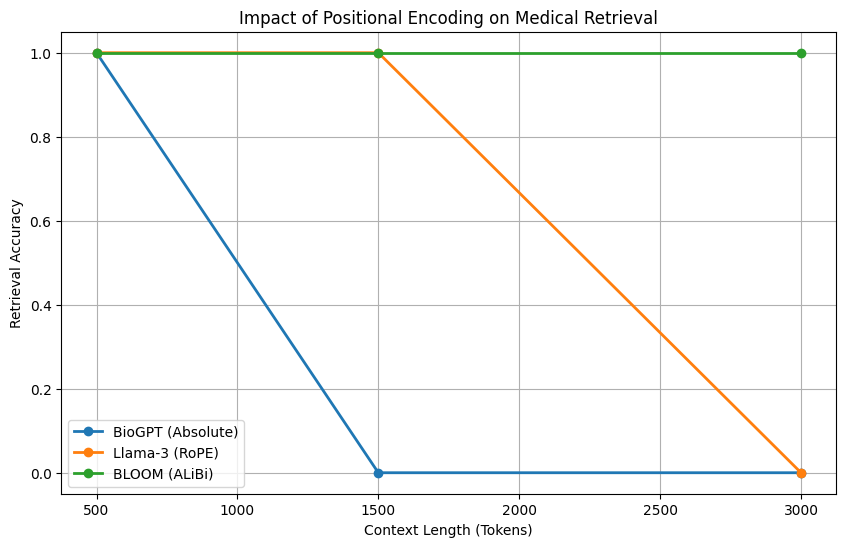

In [13]:
# ==========================================
# 🚨 STEP 1: INSTALLS (Updated with fix)
# ==========================================
# We added 'sacremoses' to fix the BioGPT error
!pip install -q -U torch transformers accelerate bitsandbytes sentencepiece matplotlib scipy sacremoses

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import matplotlib.pyplot as plt
import pandas as pd
import gc

# ==========================================
# 🚨 STEP 2: THE EXPERIMENT SETUP
# ==========================================

# The 3 Competitors
MODELS_TO_TEST = {
    "BioGPT (Absolute)": "microsoft/biogpt",           # Control: Fails at >1024
    "Llama-3 (RoPE)": "unsloth/llama-3-8b-Instruct-bnb-4bit", # Standard: Lost in Middle
    "BLOOM (ALiBi)": "bigscience/bloom-560m"           # Specialist: Extrapolates
}

# The "Needle" (The secret fact the agent must find)
NEEDLE = " DIAGNOSIS: SEVERE ALLERGY TO PENICILLIN. "
FILLER = "Patient reports normal vitals. BP 120/80. Heart rate 72. No acute distress. "

def generate_context(length, needle_depth=0.5):
    """Creates a patient record of 'length' tokens with the needle hidden in the middle."""
    total_chars = length * 4
    haystack = FILLER * (total_chars // len(FILLER))
    insert_idx = int(len(haystack) * needle_depth)
    return haystack[:insert_idx] + NEEDLE + haystack[insert_idx:]

def run_experiment():
    results = []

    for model_name, model_id in MODELS_TO_TEST.items():
        print(f"\n🔄 Loading {model_name}...")

        try:
            tokenizer = AutoTokenizer.from_pretrained(model_id)

            # Special handling for Llama-3 (Already 4-bit) vs Others
            if "unsloth" in model_id:
                model = AutoModelForCausalLM.from_pretrained(
                    model_id,
                    device_map="auto",
                    trust_remote_code=True
                )
            else:
                # BioGPT and BLOOM need quantization to fit
                bnb_config = BitsAndBytesConfig(
                    load_in_4bit=True,
                    bnb_4bit_compute_dtype=torch.float16,
                    bnb_4bit_quant_type="nf4"
                )
                model = AutoModelForCausalLM.from_pretrained(
                    model_id,
                    quantization_config=bnb_config,
                    device_map="auto",
                    trust_remote_code=True
                )

        except Exception as e:
            print(f"❌ Failed to load {model_name}: {e}")
            continue

        # Test Lengths
        lengths = [500, 1500, 3000]

        for length in lengths:
            print(f"   🧪 Testing Length: {length}...", end=" ")

            # Check for BioGPT Hard Limit
            if "biogpt" in model_id and length > 1024:
                print("Skipped (Known Limit)")
                results.append({"Model": model_name, "Context Length": length, "Success": 0})
                continue

            context = generate_context(length)
            prompt = f"{context}\n\nQuestion: What is the patient's allergy?\nAnswer:"

            try:
                inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=4096).to("cuda")
                outputs = model.generate(**inputs, max_new_tokens=20)
                output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

                success = "penicillin" in output_text.lower()
                print(f"Result: {'✅' if success else '❌'}")
            except Exception:
                print("CRASH")
                success = False

            results.append({
                "Model": model_name,
                "Context Length": length,
                "Success": 1 if success else 0
            })

        # Clean memory
        del model
        del tokenizer
        gc.collect()
        torch.cuda.empty_cache()

    return pd.DataFrame(results)

# ==========================================
# 🚨 STEP 3: EXECUTE & PLOT
# ==========================================
df = run_experiment()

print("\n--- RAW DATA FOR PAPER ---")
print(df)



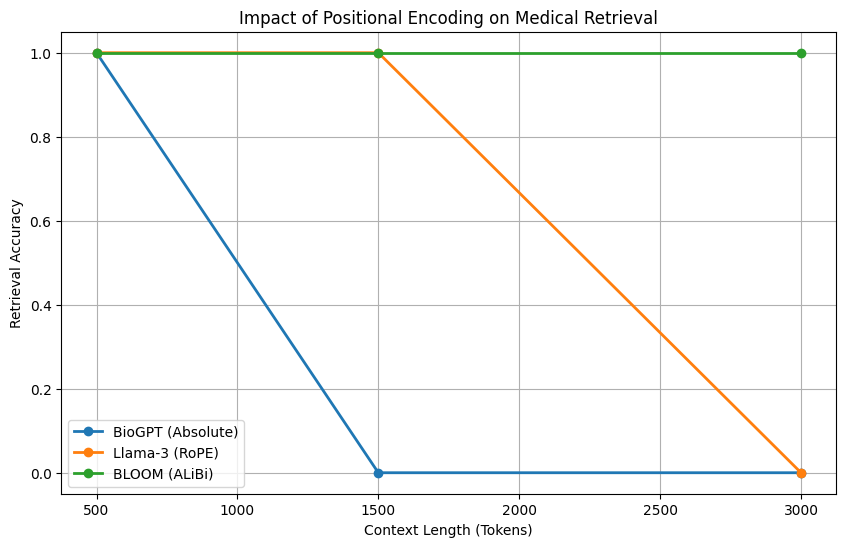

In [18]:
# Plot Graph
plt.figure(figsize=(10, 6))
for model in df['Model'].unique():
    subset = df[df['Model'] == model]
    plt.plot(subset['Context Length'], subset['Success'], marker='o', label=model, linewidth=2)

plt.title("Impact of Positional Encoding on Medical Retrieval")
plt.xlabel("Context Length (Tokens)")
plt.ylabel("Retrieval Accuracy")
plt.legend()
plt.grid(True)
plt.show()
